# Low-Rank Structure in Gaussian Covariances

This notebook explores how low-rank changes in Gaussian coefficient matrices affect covariance structure.
The emphasis is on empirical covariance, eigenvalues, and matrix rank.

## Background

$$
x = W z + \varepsilon,\quad z \sim \mathcal{N}(0, I_k),\quad \varepsilon \sim \mathcal{N}(0, \sigma^2 I_d)
$$

$$
\Sigma = W W^\top + \sigma^2 I_d.
$$

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh

rng = np.random.default_rng(0)

In [78]:
d = 40
k = 8
sigma = 0.1
n = 1500

W0 = rng.normal(size=(d, k))
Sigma0 = W0 @ W0.T + sigma**2 * np.eye(d)

## Low-Rank vs Diffuse Coefficient Changes

In [79]:
rank_star = 2

B = rng.normal(size=(d, rank_star))
A = rng.normal(size=(rank_star, k))
DeltaW_lr = B @ A

D = rng.normal(size=(d, k))
DeltaW_dense = D / np.linalg.norm(D, 'fro') * np.linalg.norm(DeltaW_lr, 'fro')

In [80]:
def sample(W):
    z = rng.normal(size=(n, k))
    eps = sigma * rng.normal(size=(n, d))
    return z @ W.T + eps

#S_lr = (sample(W0 + DeltaW_lr).T @ sample(W0 + DeltaW_lr)) / n
#S_dense = (sample(W0 + DeltaW_dense).T @ sample(W0 + DeltaW_dense)) / n

sample1 = sample(W0+DeltaW_lr)
sample2 = sample(W0+DeltaW_dense)

S_lr = (sample1.T @ sample1) / n
S_dense = (sample2.T @ sample2) / n

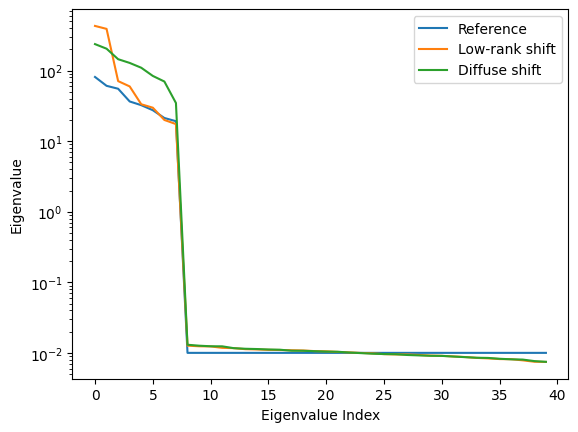

In [81]:
eig0 = eigvalsh(Sigma0)
eig_lr = eigvalsh(S_lr)
eig_dense = eigvalsh(S_dense)
#print(eig0)
#print(eig_lr)
#print(eig_dense)

plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.semilogy(eig0[::-1], label='Reference')
plt.semilogy(eig_lr[::-1], label='Low-rank shift')
plt.semilogy(eig_dense[::-1], label='Diffuse shift')
plt.legend()
plt.show()

In [85]:
threshold = 0.1
rel_lr = np.abs(eig_lr[::-1] - eig0[::-1]) / eig0[::-1]
rel_dense = np.abs(eig_dense[::-1] - eig0[::-1]) / eig0[::-1]
#print(rel_lr)
#print(rel_dense)
num_lr_changed = int(np.sum(rel_lr > threshold))
num_dense_changed = int(np.sum(rel_dense > threshold))

print("Count how many eigenvalues change significantly in the low-rank case:", num_lr_changed)
print("Count how many eigenvalues change significantly in the diffuse case:", num_dense_changed)



Count how many eigenvalues change significantly in the low-rank case: 21
Count how many eigenvalues change significantly in the diffuse case: 26


Step 4: Interpret the results:
1. In the low-rank case, how many eigenvalues change substantially, and how does this number relate to the rank of the coefficient modification?

When I set threshold as 10%, there are 21 eigenvalues changing substantially in the low-rank case. And the number is much larger than the rank of the coefficient modification, which is 2.

2. In the diffuse case, why are many eigenvalues affected, even though the overall magnitude the change is the same?

There are 26 eigenvalues changing substantially in the diffuse case. The overall magnitude of the change is the same because the diffuse modification distributes its energy across many directions in the coefficient space, which means it causes more widespread changes across many variance directions in the covariance matrix.

3. How do these observations illustrate the idea that matrix rank limites the number of variance directions that can change?

They illustrate that matrix rank limits the number of geometric directions in which variance can change. In low-rank case, only a small number of directions are altered, while additional changes arise from noise and empirical estimation. While in a diffuse case, many directions are changed, not only a small part.